In [8]:
'''
    attribute names - turkish
    
    İNTİHAR VAKALARI VERİ SETİ - KEŞİFSEL VERİ ANALİZİ
    
    country : ülkeler
    year : intihar vakasının gerçekleştiği yıl
    sex : intihar eden kişinin cinsiyeti
    age : intihar eden kişinin yaşı
    suicides_no : ülkeye ait intihar sayısı
    population : ülke nüfusu
    suicides/100k pop : 100 bin kişide intihar vakası oranı
    country-year : ülke ve yıl
    HDI for year : ülkenin o yıl için hesaplanan insani gelişim endeksi
    gdp_for_year$ : ülkenin o yıl için hesaplanan gayri safi hasılası
    gdp_per_capita : ülkenin o yıl için hesaplanan gayri safi yurtiçi hasılasının popülasyona oranı
    generation : intihar vakasına ait jenerasyon 

'''
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import geopandas


In [9]:
dataset = pd.read_csv('master.csv')

In [33]:
dataset.head(10)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [34]:
dataset.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


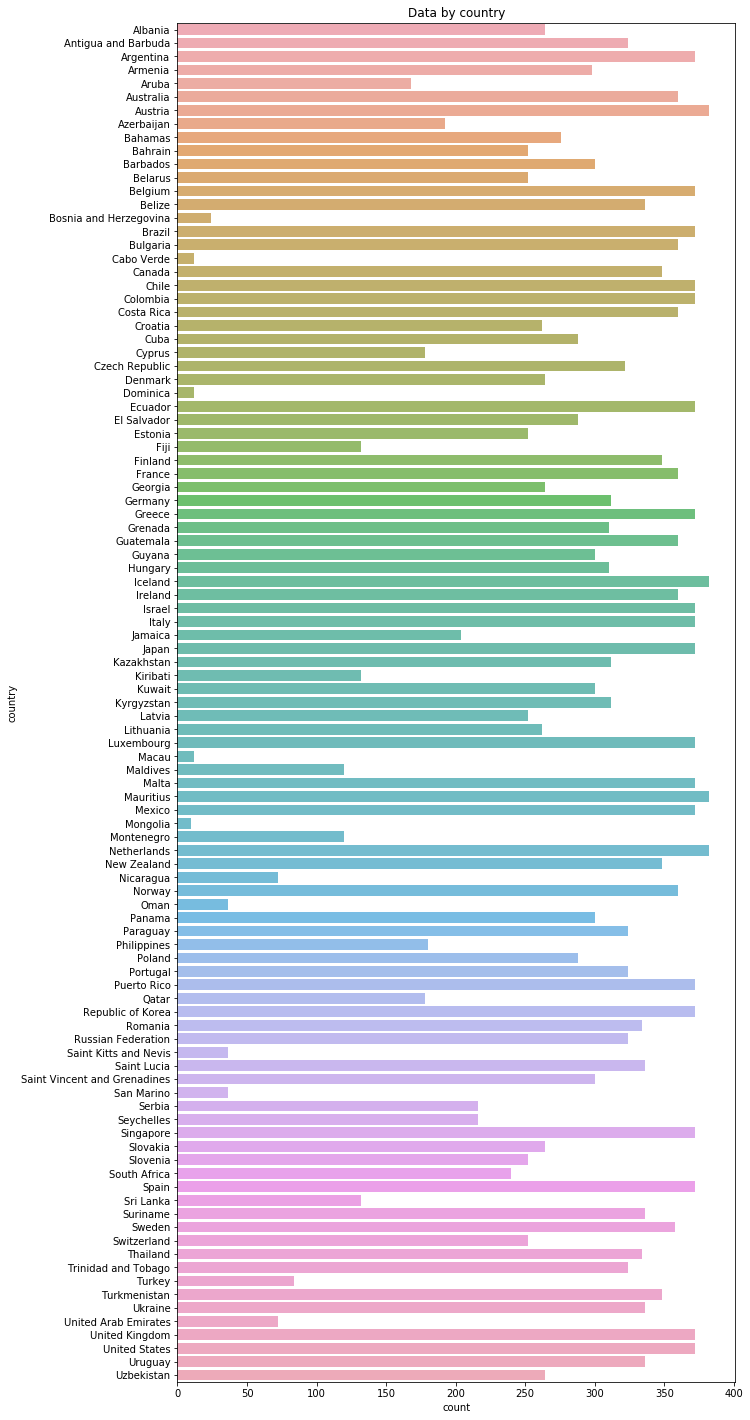

In [32]:
alpha = 0.8
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=dataset, alpha=alpha)
plt.title('Data by country')
plt.show()

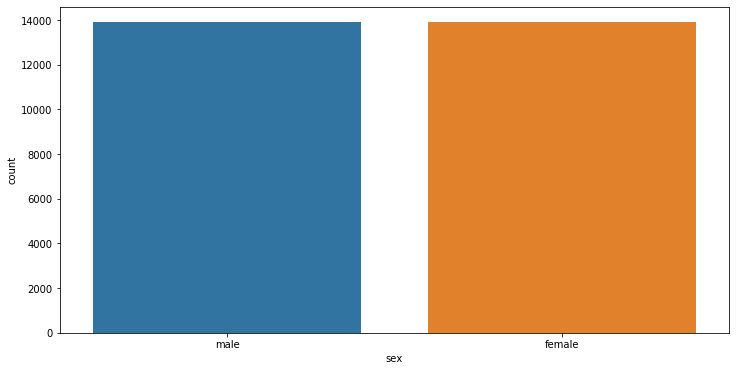

In [24]:
plt.figure(figsize=(12,6))
sex = sns.countplot(x='sex' , data=dataset)

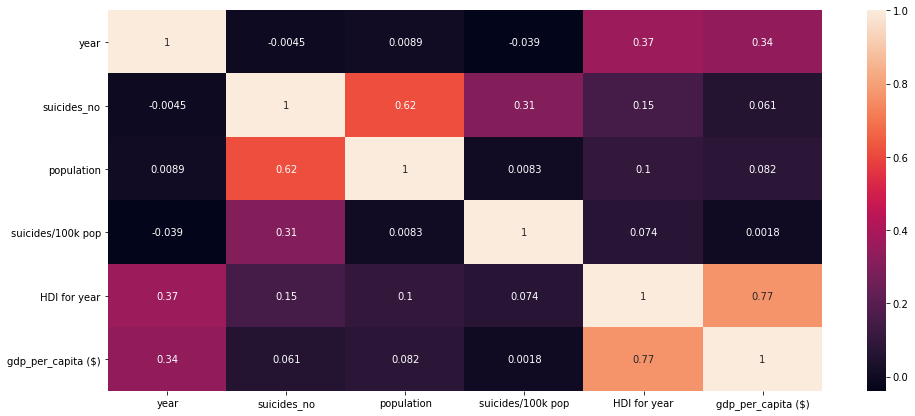

In [25]:
plt.figure(figsize=(16,7))
cor = sns.heatmap(dataset.corr(), annot = True)

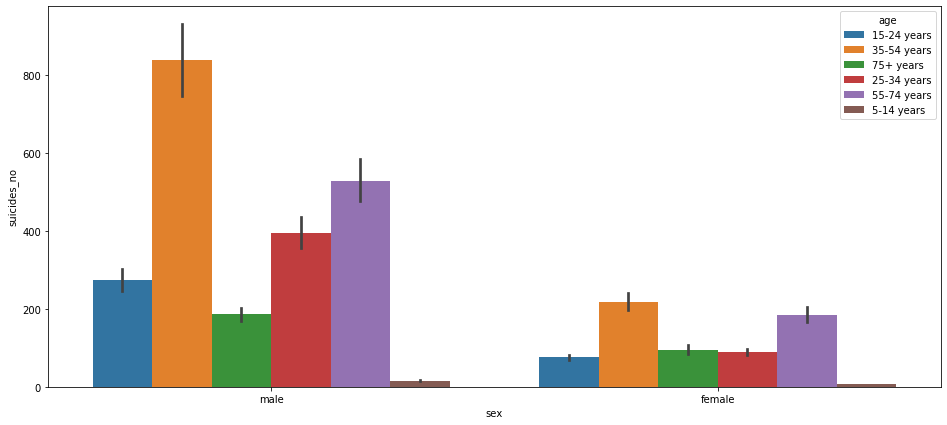

In [26]:
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = dataset)

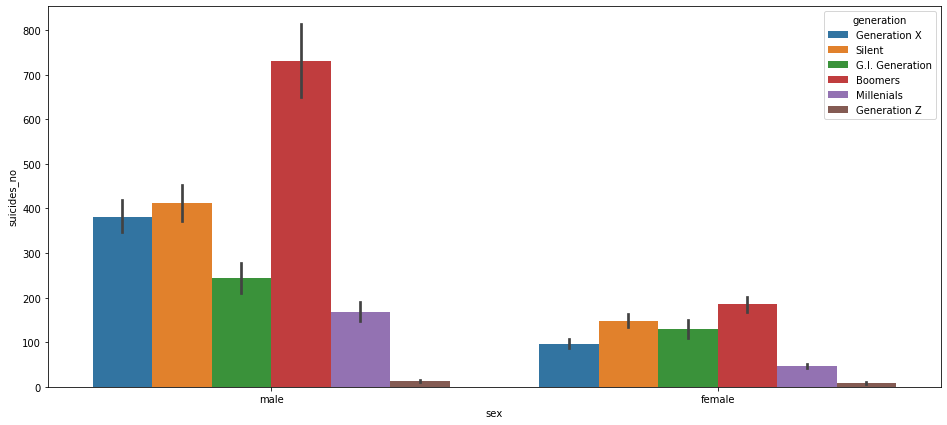

In [27]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = dataset)

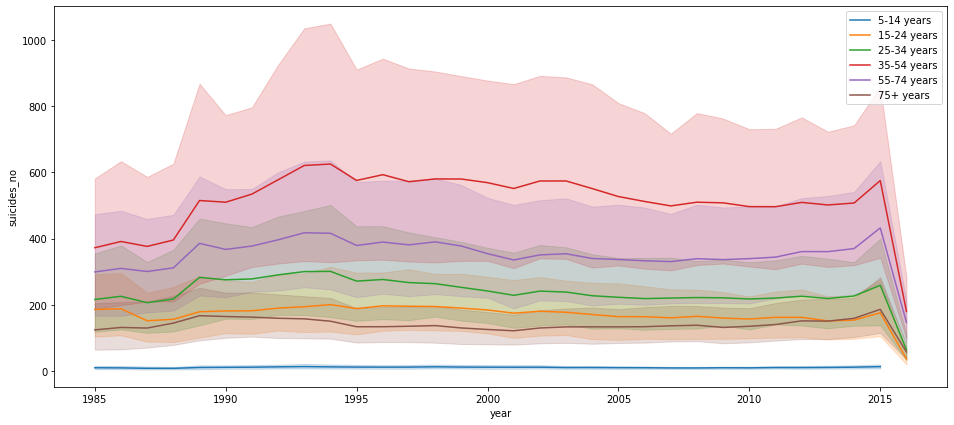

In [28]:
age_5 = dataset.loc[dataset.loc[:, 'age']=='5-14 years',:]
age_15 = dataset.loc[dataset.loc[:, 'age']=='15-24 years',:]
age_25 = dataset.loc[dataset.loc[:, 'age']=='25-34 years',:]
age_35 = dataset.loc[dataset.loc[:, 'age']=='35-54 years',:]
age_55 = dataset.loc[dataset.loc[:, 'age']=='55-74 years',:]
age_75 = dataset.loc[dataset.loc[:, 'age']=='75+ years',:]

plt.figure(figsize=(16,7))
age_5_lp = sns.lineplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.lineplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.lineplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.lineplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.lineplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.lineplot(x='year', y='suicides_no', data=age_75)

leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

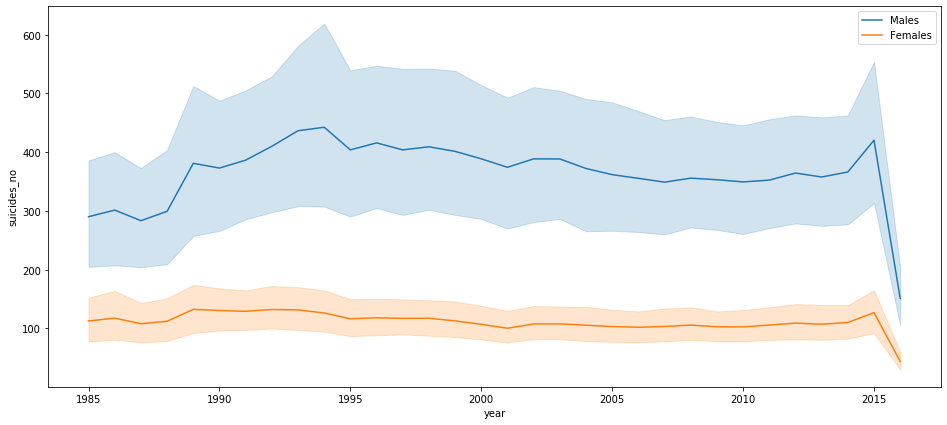

In [29]:
male_population = dataset.loc[dataset.loc[:, 'sex']=='male',:]
female_population = dataset.loc[dataset.loc[:, 'sex']=='female',:]

plt.figure(figsize=(16,7))

lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'])

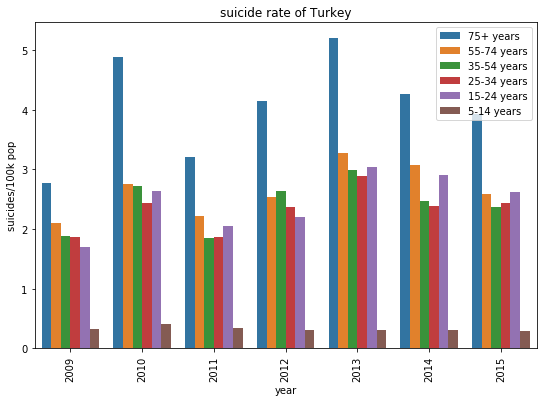

In [41]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides/100k pop", hue="age",
            ci = None,data = (dataset[dataset["country"] == "Turkey"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Turkey" )
plt.legend()    
plt.show()

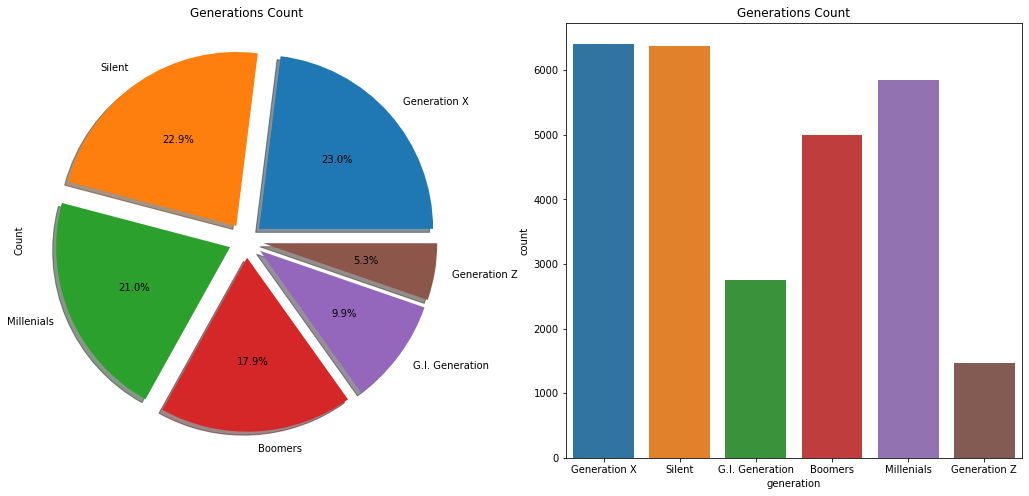

In [46]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')
sns.countplot('generation',data=dataset,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()

In [49]:
ax[0].set_title('GDI Value for suicide rates')
ax[0].set_ylabel('GDP Levels')
sns.countplot('suicides',data=dataset,ax=ax[1])
ax[1].set_title('Generations Count')
plt.show()